
# Project: Investigate a Dataset (TMBD Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### I choice TMBD Movie Data that i find it very interesting
#### This data set contains information about 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue.

## Questions
#### 1-What is the highest five popularity movies
#### 2- What is the revenue average of all movies?
#### 3- What is the highest movie revenue that directed by Christopher Nolan?
#### 4- What is the average revenue for each year ?
#### 5-What is the relation between runtime of the movie and the popularity ?

In [54]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import time
import seaborn as sns
import matplotlib

<a id='wrangling'></a>
## Data Wrangling

#### In Data wrangling section first load data then assessing data and clean it to make it more clear to analyse

### General Properties

In [55]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movies_data= pd.read_csv('tmdb-movies.csv')


In [56]:
# print first five rows to make visuel assessing 
movies_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [57]:
# make programmatic assessing 
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### release date datatype is object not datetime

In [58]:
# print ten sample rows to check it 
movies_data.sample(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3554,47760,tt1498569,0.601594,8000000,163265,Restless,Mia Wasikowska|Henry Hopper|Ryo Kase|Schuyler ...,http://www.restlessmovie.com/,Gus Van Sant,Who do you live for?,...,"A powerful and emotional coming of age story, ...",91,Drama|Romance,Columbia Pictures|Imagine Entertainment|360 Pi...,9/16/11,93,6.3,2011,7.755184e+06,1.582688e+05
435,348634,tt4767950,0.231337,0,0,A Christmas Detour,Candace Cameron Bure|Paul Greene|Sarah Strange...,http://www.hallmarkchannel.com/a-christmas-detour,Ron Oliver,NaN,...,"With Christmas only a few days away, Paige Sum...",84,Comedy|TV Movie|Romance,NaN,12/1/15,19,7.0,2015,0.000000e+00,0.000000e+00
6921,26518,tt0468526,0.084514,300000,0,Old Joy,Daniel London|Will Oldham|Tanya Smith|Robin Ro...,NaN,Kelly Reichardt,NaN,...,Two old pals reunite for a camping trip in Ore...,73,Drama,Film Science|Washington Square Films|Van Hoy/K...,1/1/06,16,6.4,2006,3.245007e+05,0.000000e+00
5541,106747,tt2002718,0.968034,12000000,15008161,Machete Kills,Danny Trejo|Mel Gibson|Amber Heard|Michelle Ro...,NaN,Robert Rodriguez,Trained to kill. Left for dead. Back for more.,...,Ex-Federale agent Machete is recruited by the ...,107,Action|Crime|Thriller,Open Road Films|Overnight Films|AR Films|Aldam...,9/12/13,399,5.2,2013,1.123240e+07,1.404814e+07
2917,14306,tt0822832,1.462242,60000000,244082376,Marley & Me,Owen Wilson|Jennifer Aniston|Eric Dane|Kathlee...,http://marleyandmemovie.com/,David Frankel,Heel the love,...,"A newly married couple who, in the process of ...",115,Comedy|Family,Sunswept Entertainment|Dune Entertainment III,12/25/08,820,6.8,2008,6.076720e+07,2.472034e+08
1276,278878,tt3375370,0.166508,0,0,The Gunfighter,Shawn Parsons|Scott Beehner|Brace Harris|Eilee...,http://erickissack.com/thegunfighter/,Eric Kissack,Just another period western meta comedy short ...,...,"In the tradition of classic westerns, a narrat...",9,Comedy|Western,NaN,3/21/14,11,7.0,2014,0.000000e+00,0.000000e+00
3531,64328,tt1204342,0.699052,45000000,165184237,The Muppets,Amy Adams|Jason Segel|Emily Blunt|John Krasins...,http://disney.go.com/muppets/,James Bobin,They're closer than you think.,...,When Kermit the Frog and the Muppets learn tha...,103,Comedy|Family|Music,Walt Disney Pictures,11/22/11,328,6.4,2011,4.362291e+07,1.601293e+08
2006,22894,tt1038686,0.992107,26000000,67918658,Legion,Paul Bettany|Dennis Quaid|Kevin Durand|Kate Wa...,http://www.legionmovie.com,Scott Stewart,"When the last angel falls, the fight for manki...",...,"When God loses faith in humankind, he sends hi...",100,Horror,Bold Films,1/21/10,376,5.0,2010,2.600000e+07,6.791866e+07
5052,9499,tt0306734,0.527492,0,12991996,Le Divorce,Kate Hudson|Naomi Watts|Melvil Poupaud|Catheri...,http://www.le-divorce.com/,James Ivory,Everything sounds sexier in French.,...,"While visiting her sister in Paris, a young wo...",117,Comedy|Drama|Romance,Fox Searchlight,8/8/03,17,5.2,2003,0.000000e+00,1.540010e+07
9217,11718,tt0098645,0.503146,0,0,Who's Harry Crumb?,John Candy|Jeffrey Jones|Annie Potts|Tim Thome...,NaN,Paul Flaherty,Nerves of steel. Body of iron. Brain of stone.,...,Harry Crumb is a bumbling and inept private in...,94,Comedy|Crime|Mystery,TriStar Pictures,2/3/89,31,5.6,1989,0.000000e+00,0.000000e+00


#### budget and revenue and other columns have rows that equal to zero



### Data Cleaning (making some changes mentioned below )
##### 1- remove columns that we will not used
##### 2- drop duplicated rows
#### 3- change release_date datatype
#### 4- drop all rows that have nulls or zeros values

In [59]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# make a copy from data then clean it
movies_data_clean= movies_data.copy()


In [60]:
# 1-Deleting not used columns 
movies_data_clean.drop(['id','imdb_id','cast','homepage','overview','tagline','keywords','production_companies','budget_adj','revenue_adj'],axis=1,inplace=True)

In [61]:
#Test
movies_data_clean.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [62]:
# 2-Find duplicated rows
duplicated_rows=movies_data_clean[movies_data_clean.duplicated()]
duplicated_rows



,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
2090,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010


In [63]:
# 2-Drop duplicated rows
movies_data_clean.drop_duplicates(inplace=True)

In [64]:
#Test
sum(movies_data_clean.duplicated())

0

In [65]:
# 3-change release_date datatype
movies_data_clean['release_date']= pd.to_datetime(movies_data_clean['release_date'])

In [66]:
#Test
movies_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 1018.6+ KB


In [67]:
# replace all zero values to NaN
movies_data_clean=movies_data_clean.replace(0,np.nan)

In [68]:
# 4- drop all nan Values
movies_data_clean.dropna(inplace=True)

In [69]:
# Test
movies_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 11 columns):
popularity        3853 non-null float64
budget            3853 non-null float64
revenue           3853 non-null float64
original_title    3853 non-null object
director          3853 non-null object
runtime           3853 non-null float64
genres            3853 non-null object
release_date      3853 non-null datetime64[ns]
vote_count        3853 non-null int64
vote_average      3853 non-null float64
release_year      3853 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 361.2+ KB


<a id='eda'></a>
## Exploratory Data Analysis

after Cleaning data now i will make some analysis to answer interested questions then make some visualization 
### Research Question 1 (what is the highest five popularity movies?)

In [70]:
# I search how to get five hights numbers in any column i find way in link below
# https://stackoverflow.com/questions/63387124/python-pandas-column-get-rows-with-highest-five-numbers
df_popularity=movies_data_clean.nlargest(5, 'popularity')[['popularity', 'original_title']] 
df_popularity


,popularity,original_title
0,32.985763,Jurassic World
1,28.419936,Mad Max: Fury Road
629,24.949134,Interstellar
630,14.311205,Guardians of the Galaxy
2,13.112507,Insurgent


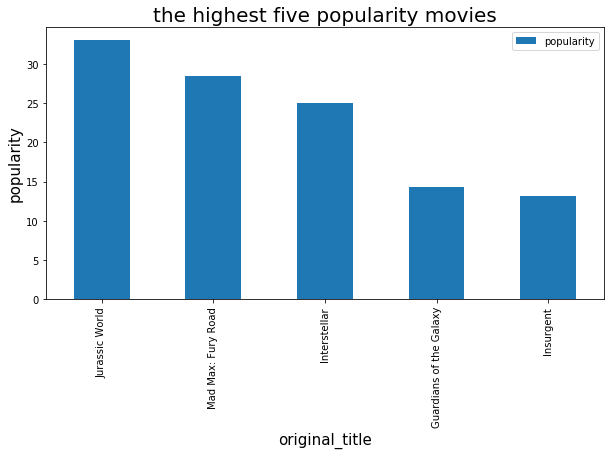

In [71]:
# explor and plot the highest five popularity movies
df_popularity.set_index('original_title').plot(kind='bar',figsize=(10,5))
plt.xlabel('original_title',size=15)
plt.ylabel('popularity',size=15)
plt.title('the highest five popularity movies',size=20);


#### we find that the most popularity movie is jurassic World

### Research Question 2  (What is the runtime average of all movies?)

In [72]:
# first define that function to calculate mean of any column
def average_function(column):
    return movies_data_clean[column].mean()


   

In [73]:
#lets calculate runtine average of all movies
average_function('runtime')

109.20892810796782

#### we find that the average run time of all moveis is 109.2 minutes

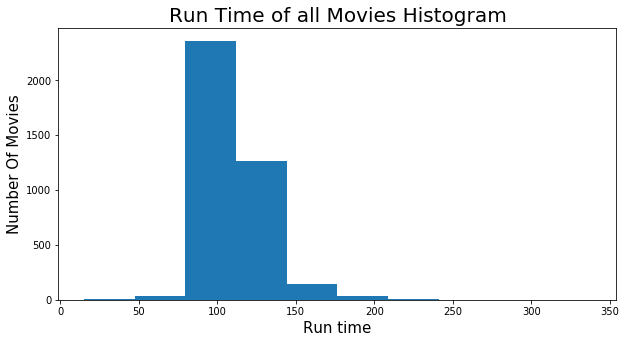

In [74]:
# explor and plot the histogram for run time of all movies
movies_data_clean['runtime'].plot(kind='hist',figsize=(10,5))
plt.xlabel('Run time',size=15)
plt.ylabel('Number Of Movies',size=15)
plt.title('Run Time of all Movies Histogram',size=20);


#### we find that histogram is right skewed and most of movies between 90 and 100 minutes

### Research Question 3 (What is the highest movie revenue that directed by Christopher Nolan?)

In [75]:
#first i get all movies taht directed by Christopher Nolan 
df_Nolan=movies_data_clean.query('director=="Christopher Nolan"')
df_Nolan

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
629,24.949134,165000000.0,6.217525e+08,Interstellar,Christopher Nolan,169.0,Adventure|Drama|Science Fiction,2014-11-05,6498,8.0,2014
1919,9.363643,160000000.0,8.255000e+08,Inception,Christopher Nolan,148.0,Action|Thriller|Science Fiction|Mystery|Adventure,2010-07-14,9767,7.9,2010
2875,8.466668,185000000.0,1.001922e+09,The Dark Knight,Christopher Nolan,152.0,Drama|Action|Crime|Thriller,2008-07-16,8432,8.1,2008
3955,1.111488,46000000.0,1.137148e+08,Insomnia,Christopher Nolan,118.0,Crime|Mystery|Thriller,2002-05-24,564,6.6,2002
4363,6.591277,250000000.0,1.081041e+09,The Dark Knight Rises,Christopher Nolan,165.0,Action|Crime|Drama|Thriller,2012-07-16,6723,7.5,2012
6191,5.400826,150000000.0,3.742187e+08,Batman Begins,Christopher Nolan,140.0,Action|Crime|Drama,2005-06-14,4914,7.3,2005
6565,2.582095,40000000.0,1.096763e+08,The Prestige,Christopher Nolan,130.0,Drama|Mystery|Thriller,2006-10-19,2519,7.8,2006
8662,3.095625,9000000.0,3.972310e+07,Memento,Christopher Nolan,113.0,Mystery|Thriller,2000-10-11,2144,7.9,2000


In [76]:
# Then find the  movie directed by Christopher Nolan that made the highest revenue
df_Nolan.nlargest(1, 'revenue')

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
4363,6.591277,250000000.0,1.081041e+09,The Dark Knight Rises,Christopher Nolan,165.0,Action|Crime|Drama|Thriller,2012-07-16,6723,7.5,2012


#### we find that The Dark Knight Rises movie is the highest revenue in all Christopher Nolan movies , it's realy great movie ! 

### Research Question 4 (What is the average revenue for each year ?)

In [77]:
# we can make that by using 2 variables group by by years then calculate mean of revenue
movies_data_clean.groupby(['release_year'])['revenue'].mean()

release_year
1960    2.580100e+07
1961    3.377202e+07
1962    2.947569e+07
1963    2.942115e+07
1964    4.694479e+07
1965    9.161637e+07
1966    1.694734e+07
1967    5.629497e+07
1968    2.469131e+07
1969    5.742677e+07
1970    4.999745e+07
1971    2.894513e+07
1972    6.011252e+07
1973    9.291776e+07
1974    5.539746e+07
1975    9.392303e+07
1976    4.999510e+07
1977    9.906097e+07
1978    6.889824e+07
1979    7.381438e+07
1980    5.748329e+07
1981    5.373338e+07
1982    8.290986e+07
1983    6.420325e+07
1984    5.729726e+07
1985    5.519938e+07
1986    4.780115e+07
1987    5.994515e+07
1988    5.485749e+07
1989    8.964569e+07
1990    8.776483e+07
1991    8.726243e+07
1992    9.596928e+07
1993    8.578492e+07
1994    1.052128e+08
1995    1.015866e+08
1996    8.975952e+07
1997    1.156503e+08
1998    1.002843e+08
1999    9.785331e+07
2000    1.033016e+08
2001    1.094903e+08
2002    1.134679e+08
2003    1.219669e+08
2004    1.121477e+08
2005    9.871410e+07
2006    9.254744e+07


#### now we can now the average revenue for each year 

### Research Question 5 (What is the relation between runtime of the movie and the popularity ?)

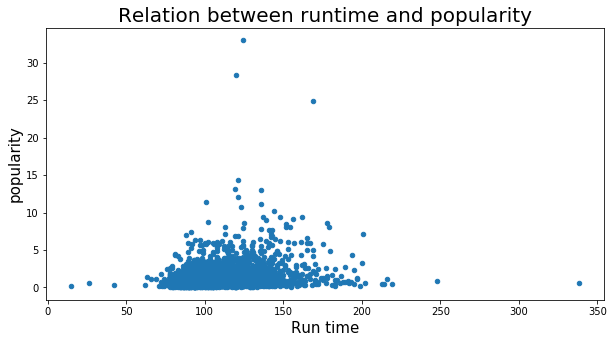

In [78]:
# lets see the relation between runtime of the movie and the popularity
movies_data_clean.plot(x='runtime',y='popularity',kind='scatter',figsize=(10,5))
plt.xlabel('Run time',size=15)
plt.ylabel('popularity',size=15)
plt.title('Relation between runtime and popularity',size=20);



#### we can find that the short movies are popular than long movies 

<a id='conclusions'></a>
## Conclusions
after read csv file and assessing data i find some questions that i want to answer it so i clear my data then explore and make some analysis in it and i got that 

1- the most popularity movie in dataset is jurassic World

2- the runtime average of all movies is 109.2 minutes

3- the Dark Knight Rises movie is the highest revenue in all Christopher Nolan movies that mentioned in this dataset

4- find the average revenue for each year in dataset
5- the short movies are popular than long movies 

## limitations
lot of rows are zeros or nulls and some rows values like 1.637683e+08  and i don't find how to make the number appear in the right way and drop all missing Values made analysis inaccurate.


In [79]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0